In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  2 20:22:48 2023

@author: erhon
"""

import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
#%%

In [ ]:
path_550C_Bi2O3 = r"...\DRX_Data\Bi2O3_200nm_550C_subtracted.xy"
path_550C_5h_Bi2O3 = r"...\DRX_Data\Alfa_BiO_550C_5h_subtracted.xy"

In [ ]:
df_550C_Bi2O3 = pd.read_csv(path_550C_Bi2O3, sep=" ", names = ['2theta','intensity'], header=None)
df_550C_5h_Bi2O3 = pd.read_csv(path_550C_5h_Bi2O3, sep=" ",  skiprows=1, names = ['2theta','intensity'])


In [ ]:
path_pattern_Bi2O3_alpha = r"...\DRX\bi2o3_alpha_pattern.txt"
path_pattern_Bi2O3_beta = r"...\DRX\bi2o3_beta_pattern.txt"

path_pattern_Bi =  r"...\DRX\bi_pattern_xrd.txt"




df_pattern_Bi2O3_alpha = pd.read_csv(path_pattern_Bi2O3_alpha, sep="\t") # 76-1730
df_pattern_Bi2O3_beta = pd.read_csv(path_pattern_Bi2O3_beta, sep="\t") # 27-50
df_pattern_Bi = pd.read_csv(path_pattern_Bi, sep="\t") # 85-1331

In [ ]:
path_pattern_FTO = r"...\DRX\fto_pattern_xrd.txt"
df_pattern_FTO = pd.read_csv(path_pattern_FTO, sep="\t") # 77-452


#%%

In [131]:
def d_to_2theta(df):
    n = 1
    wave = 1.5406
    d = np.array(df['d'])
    X = ((n*wave)/(2*d))
    two_theta = 2*np.arcsin(X)
    df['2theta'] = np.rad2deg(two_theta)
    return ()

d_to_2theta(df_pattern_Bi2O3_alpha)
d_to_2theta(df_pattern_Bi2O3_beta)
d_to_2theta(df_pattern_Bi)
d_to_2theta(df_pattern_FTO)

()

In [133]:
bool_val_Bi2O3_alpha = df_pattern_Bi2O3_alpha['2theta'].between(15, 80, inclusive='both')
df_pat_Bi2O3_alpha = df_pattern_Bi2O3_alpha[bool_val_Bi2O3_alpha]

bool_val_Bi2O3_beta = df_pattern_Bi2O3_beta['2theta'].between(15, 80, inclusive='both')
df_pat_Bi2O3_beta= df_pattern_Bi2O3_beta[bool_val_Bi2O3_beta]

bool_val_Bi = df_pattern_Bi['2theta'].between(15, 80, inclusive='both')
df_pat_Bi = df_pattern_Bi[bool_val_Bi]

bool_val_FTO = df_pattern_FTO['2theta'].between(15, 80, inclusive='both')
df_pat_FTO = df_pattern_FTO[bool_val_FTO]

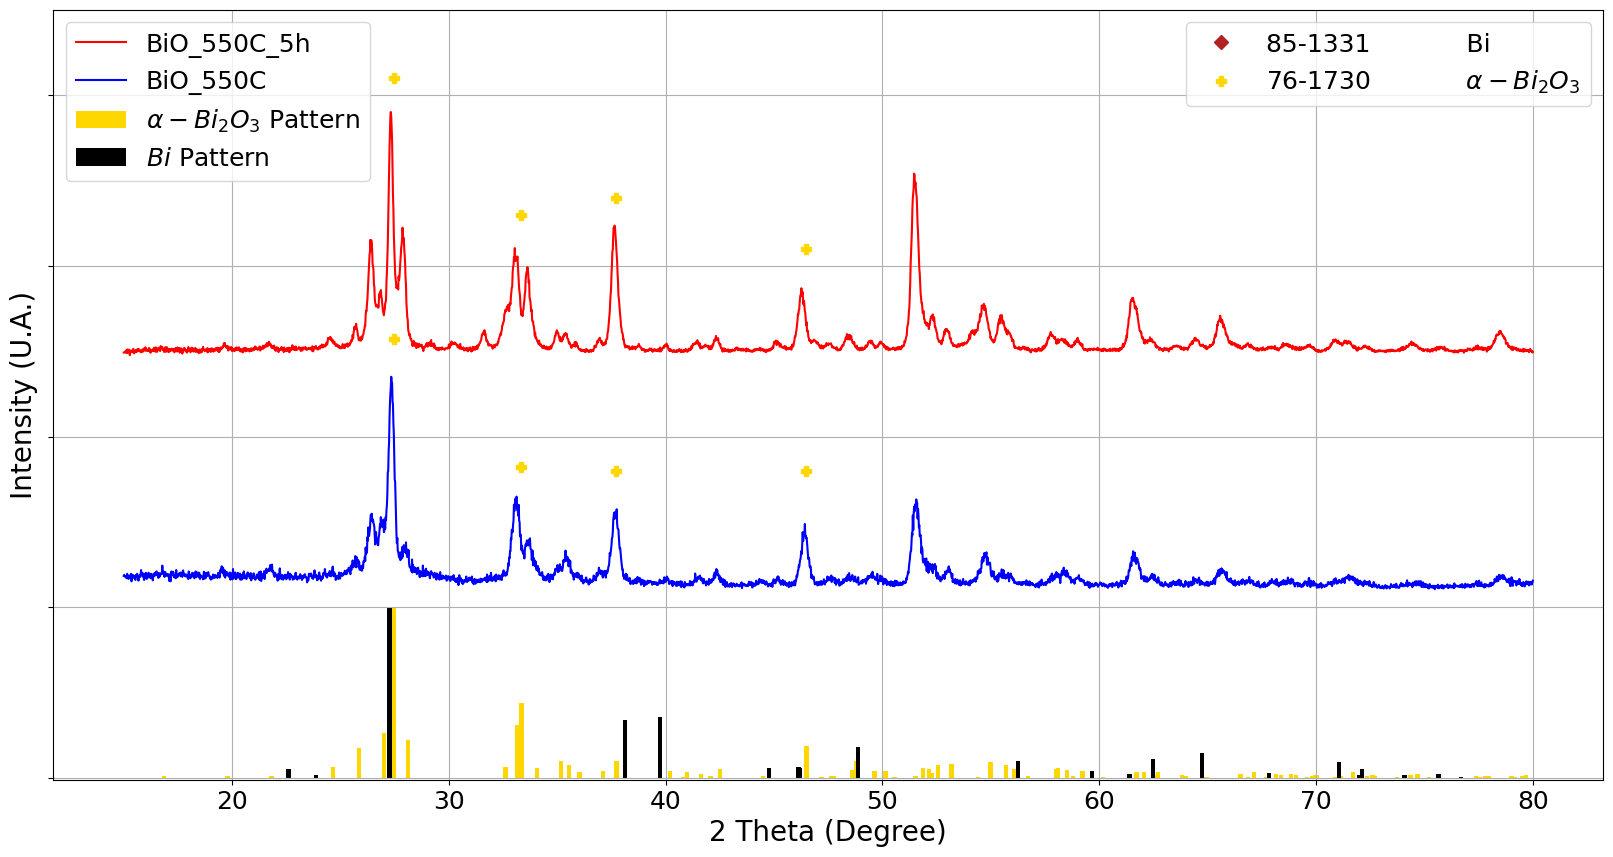

In [177]:
x_labelsize=18  
figSize = (20, 10)
fig, ax = plt.subplots(figsize=figSize)
#############################################################################################################################################
#        Ax1
#############################################################################################################################################

l4, = ax.plot(df_550C_Bi2O3['2theta'], df_550C_Bi2O3['intensity']+110, color='blue', linestyle = 'solid', label = 'BiO_550C')
l3, = ax.plot(df_550C_5h_Bi2O3['2theta'], 0.1*df_550C_5h_Bi2O3['intensity']+250, color='red', linestyle = 'solid', label = 'BiO_550C_5h')


lp1 = ax.bar(df_pat_Bi2O3_alpha['2theta'],(df_pat_Bi2O3_alpha['I']*0.1), width = 0.2,align='center', color = 'gold', label = r'$\alpha - Bi_{2}O_{3}$') 
lp2 = ax.bar(df_pat_Bi['2theta'],(df_pat_Bi['I']*0.1), width = 0.2,align='center', color = 'black', label = r'$Bi$') 


#############################################################################################################################################
# Alpha - Bi2O3
#############################################################################################################################################
lm1, = ax.plot(27.47, 257, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold", linestyle = 'None')
ax.plot(33.34, 182, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold")
ax.plot(37.73, 180, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold")
ax.plot(46.49, 180, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold")


### BiO Alfa 550C 5h ###
ax.plot(27.47, 410, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold", linestyle = 'None')
ax.plot(33.34, 330, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold")
ax.plot(37.73, 340, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold")
ax.plot(46.49, 310, marker="P", markersize=7, markeredgecolor="gold", markerfacecolor="gold")




# leg1 = ax.legend([l3, l4, lp1],['BiO_550C_5h', 'BiO_550C', r'$\alpha -Bi_{2}O_{3}$ Pattern'], loc='upper left', frameon=True,fontsize = 18)
# leg2 = ax.legend([lm1, lm2],[r'76-1730            $\alpha -Bi_{2}O_{3}$'], loc='upper right', frameon=True,fontsize = 18)

leg1 = ax.legend([l3, l4, lp1, lp2],['BiO_550C_5h', 'BiO_550C', r'$\alpha -Bi_{2}O_{3}$ Pattern', r'$Bi$ Pattern'], loc='upper left', frameon=True,fontsize = 18)

leg2 = ax.legend([lm2, lm1],['85-1331            Bi', r'76-1730            $\alpha -Bi_{2}O_{3}$'], loc='upper right', frameon=True,fontsize = 18)


ax.add_artist(leg1)


plt.ylim(-1,450)
plt.gca().axes.yaxis.set_ticklabels([])
ax.set_ylabel("Intensity (U.A.)", fontsize = 20)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('2 Theta (Degree)', fontsize = 20)
ax.grid(True)
# ax.legend(loc = 'upper left', fontsize = 18)

ax.xaxis.set_tick_params(labelsize=x_labelsize)


#%%